In [2]:
import sklearn
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression

import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12, 8)
pd.options.display.max_rows = 20

In [3]:
df = pd.read_csv("dataset/tengri_labels.csv")
df

,url,title,text,length_text,length_title,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10
0,https://kaz.tengrinews.kz/crime/korganyis-mini...,Қорғаныс министрлігінің генералы пара алғаны ү...,\nҚР Қорғаныс министрлігі Кадр және әскери біл...,820,58,0.050774,0.054113,0.044982,0.070719,0.455267,0.065864,0.064421,0.047815,0.053719,0.092326
1,https://kaz.tengrinews.kz/crime/shko-da-ek-tur...,"ШҚО-да екі тұрғын алаяққа сеніп, 23 миллион те...",\nШығыс Қазақстан облысында екі тұрғын алаяққа...,1502,69,0.037904,0.064964,0.310088,0.160908,0.061063,0.070757,0.069464,0.114666,0.038619,0.071567
2,https://kaz.tengrinews.kz/crime/oralda-dene-sh...,Оралда дене шынықтыру мұғалімі мүгедек балалар...,\nОрал интернатында мүгедек балаларды доппен ұ...,1093,61,0.099275,0.038576,0.059848,0.128228,0.138122,0.106794,0.239784,0.044609,0.060227,0.084537
3,https://kaz.tengrinews.kz/events/kostanay-obly...,Қостанай облысында 30 тонна қарбыз тиелген Кам...,\nҚостанай облысында үш көлік жол апатына ұшыр...,615,64,0.068832,0.452256,0.067968,0.060217,0.058978,0.059580,0.056291,0.057066,0.062492,0.056319
4,https://kaz.tengrinews.kz/crime/semeyde-mektep...,"Семейде мектеп есепшісі 3,2 миллион теңге жымқ...",\nСемейде мектептің бас есепшісі үш миллион те...,919,66,0.043608,0.049475,0.176150,0.081801,0.353823,0.059049,0.073021,0.053451,0.053743,0.055879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975,https://kaz.tengrinews.kz/crime/syinyiptasyin-...,Сыныптасын зорлаған оралдық оқушылар тергеуге ...,\nОралда 9-сыныпта оқитын қызды зорлағандардың...,2011,52,0.036567,0.033483,0.105830,0.089820,0.051490,0.057490,0.310787,0.041901,0.180956,0.091677
1976,https://kaz.tengrinews.kz/events/almatyilyikta...,Алматылықтар жер сілкінісін сезді,\nАлматыдан 242 шақырым жерде жер сілкінісі бо...,480,33,0.071226,0.107420,0.108596,0.077648,0.082402,0.081307,0.064009,0.245698,0.085407,0.076288
1977,https://kaz.tengrinews.kz/crime/almatyida-aryi...,Алматыда арық қақпағын ұрлаған самокатшы видео...,\nАлматыда самокат мінген ер адамның арықтың т...,1248,60,0.175678,0.060513,0.078314,0.051802,0.048866,0.088543,0.142265,0.063078,0.116121,0.174820
1978,https://kaz.tengrinews.kz/crime/karagandyida-a...,Қарағандыда әкімдік шенеуніктері пара алды дег...,\nҚарағандыда пара алды деген күдікпен жер қат...,708,63,0.051457,0.051525,0.108129,0.101895,0.268839,0.147477,0.058989,0.055666,0.071467,0.084554


In [4]:
import re

def cleaning_data(code_data):
    text = code_data
    text = text.replace('(<br/>)', '')
    text = text.replace('(<a).*(>).*(</a>)', '')
    text = text.replace('(&amp)', '')
    text = text.replace('(&gt)', '')
    text = text.replace('(&lt)', '')
    text = text.replace('(\xa0)', ' ')
    text = text.replace('-', ' ')
    text = text.replace('(', ' ')
    text = text.replace(')', ' ')
    text = filtering(text)
    return text.strip()

def filtering(text):
    stripped = re.sub('[^a-zA-Z, ^А-Я,а-я,Ә,І,Ң,Ғ,Ү,Ұ,Қ,Ө,Һ,ә,і,ə,ң,ғ,ү,ұ,қ,ө,һ]', ' ', str(text).replace('-', ''))
    stripped = re.sub('_', '', stripped)
    stripped = re.sub('\s+', ' ', stripped)
    return str(stripped).lower()

In [25]:
class_names = ['topic1', 'topic2', 'topic3', 'topic4', 'topic5',
               'topic6', 'topic7', 'topic8', 'topic9', 'topic10']

In [26]:
X = pd.DataFrame(list(map(cleaning_data, df.text)))[0]
y = df[class_names].values
X

0       қр қорғаныс министрлігі кадр және әскери білім...
1       шығыс қазақстан облысында екі тұрғын алаяққа с...
2       орал интернатында мүгедек балаларды доппен ұрғ...
3       қостанай облысында үш көлік жол апатына ұшырап...
4       семейде мектептің бас есепшісі үш миллион теңг...
                              ...                        
1975    оралда сыныпта оқитын қызды зорлағандардың ара...
1976    алматыдан шақырым жерде жер сілкінісі болды, д...
1977    алматыда самокат мінген ер адамның арықтың тор...
1978    қарағандыда пара алды деген күдікпен жер қатын...
1979    алматыда аса қауіпті қылмыскер қашуға тырысып,...
Name: 0, Length: 1980, dtype: object

In [27]:
y = y[(X != '').values]
X = X[(X != '').values]

In [28]:
y_classical = y.argmax(axis=1)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y_classical, test_size = 0.2)
print(len(X_train))
print(len(X_test))

1584
396


In [48]:
from nltk.corpus import stopwords

vectorizer = TfidfVectorizer(lowercase=True, sublinear_tf=True, smooth_idf=True, max_df=0.1, min_df=0.001)
x_train_tf = vectorizer.fit_transform(X_train)
x_test_tf = vectorizer.transform(X_test)
print(x_train_tf.shape)

(1584, 10314)


In [49]:
import itertools

def plot_classification_report(classificationReport,
                               title='Classification report',
                               cmap='Greens'):
    df = pd.DataFrame(classificationReport).T.iloc[:,:3]
    df.style.background_gradient(cmap='viridis',
                             subset=pd.IndexSlice['0':'9', :'f1-score'])
    return df

c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


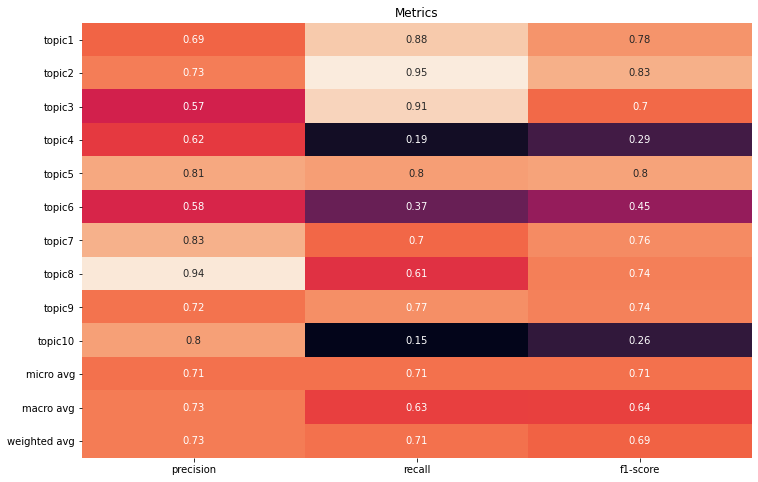

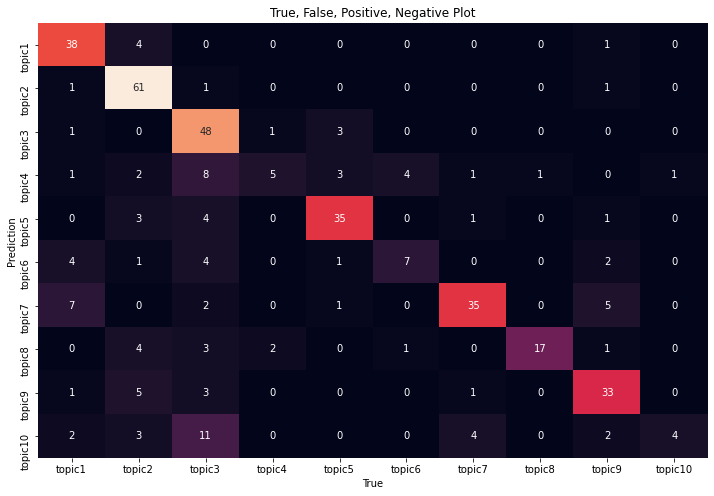

In [50]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train_tf, y_train)

predictions = model.predict(x_test_tf)

sns.heatmap(plot_classification_report(classification_report(y_test, predictions, output_dict=True, target_names=class_names)),
            square=False, annot=True, cbar=False)
plt.title('Metrics')
plt.show()

sns.heatmap(confusion_matrix(y_test, predictions), square=False, annot=True, cbar=False,
            xticklabels=class_names,
            yticklabels=class_names)
plt.title('True, False, Positive, Negative Plot')
plt.xlabel('True')
plt.ylabel('Prediction')
plt.show()

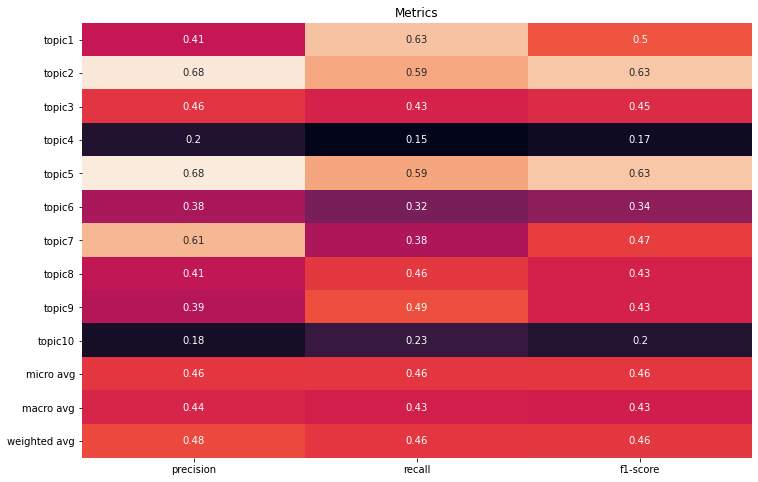

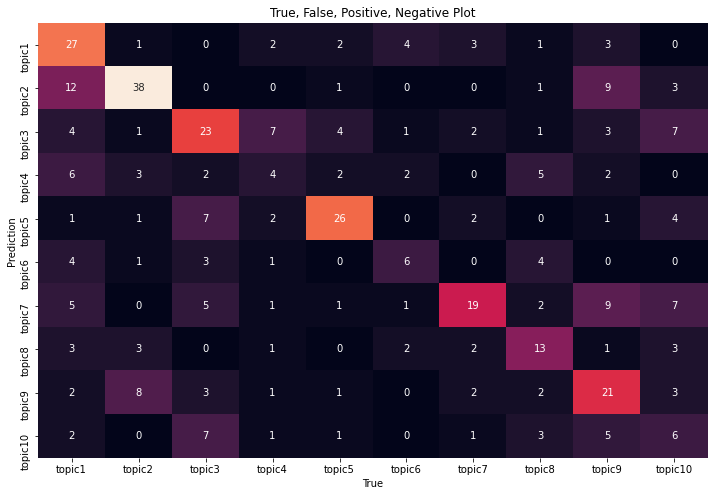

In [52]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train_tf, y_train)

predictions = model.predict(x_test_tf)

sns.heatmap(plot_classification_report(classification_report(y_test, predictions, output_dict=True, target_names=class_names)),
            square=False, annot=True, cbar=False)
plt.title('Metrics')
plt.show()

sns.heatmap(confusion_matrix(y_test, predictions), square=False, annot=True, cbar=False,
            xticklabels=class_names,
            yticklabels=class_names)
plt.title('True, False, Positive, Negative Plot')
plt.xlabel('True')
plt.ylabel('Prediction')
plt.show()

c:\users\yelzha\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


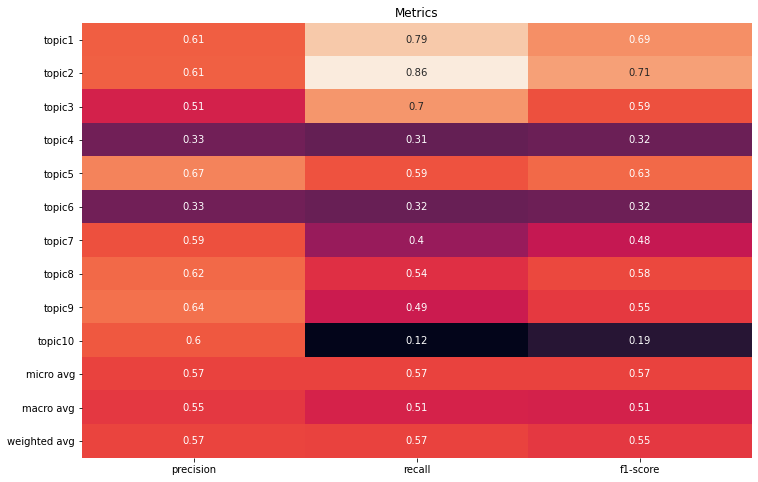

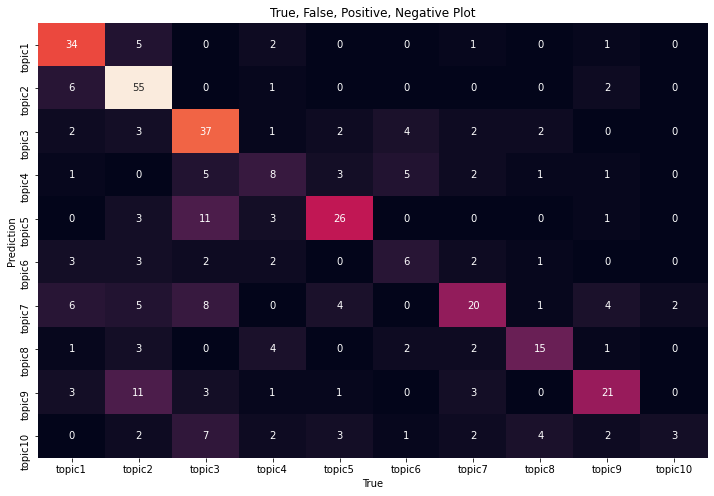

In [53]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train_tf, y_train)

predictions = model.predict(x_test_tf)

sns.heatmap(plot_classification_report(classification_report(y_test, predictions, output_dict=True, target_names=class_names)),
            square=False, annot=True, cbar=False)
plt.title('Metrics')
plt.show()

sns.heatmap(confusion_matrix(y_test, predictions), square=False, annot=True, cbar=False,
            xticklabels=class_names,
            yticklabels=class_names)
plt.title('True, False, Positive, Negative Plot')
plt.xlabel('True')
plt.ylabel('Prediction')
plt.show()

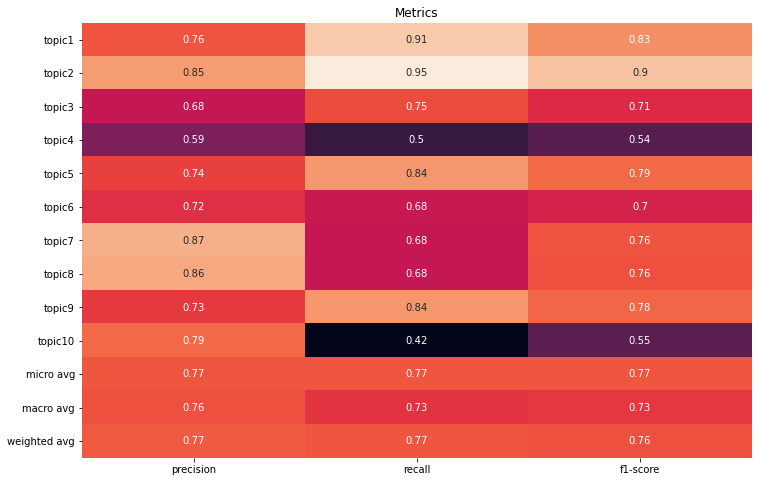

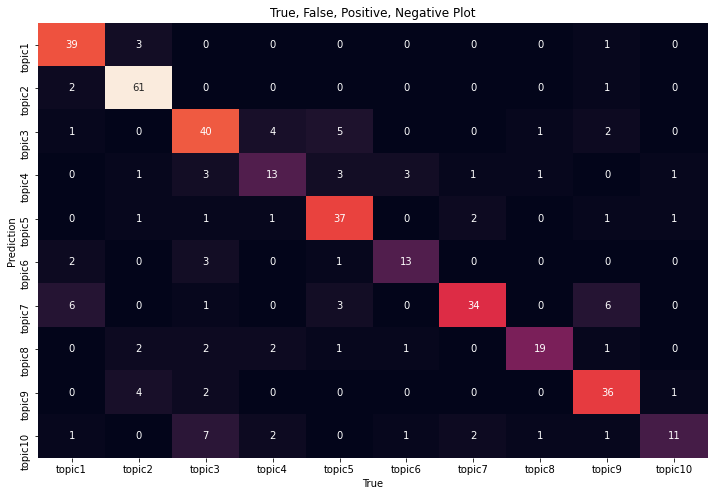

In [54]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier()
model.fit(x_train_tf, y_train)

predictions = model.predict(x_test_tf)

sns.heatmap(plot_classification_report(classification_report(y_test, predictions, output_dict=True, target_names=class_names)),
            square=False, annot=True, cbar=False)
plt.title('Metrics')
plt.show()

sns.heatmap(confusion_matrix(y_test, predictions), square=False, annot=True, cbar=False,
            xticklabels=class_names,
            yticklabels=class_names)
plt.title('True, False, Positive, Negative Plot')
plt.xlabel('True')
plt.ylabel('Prediction')
plt.show()

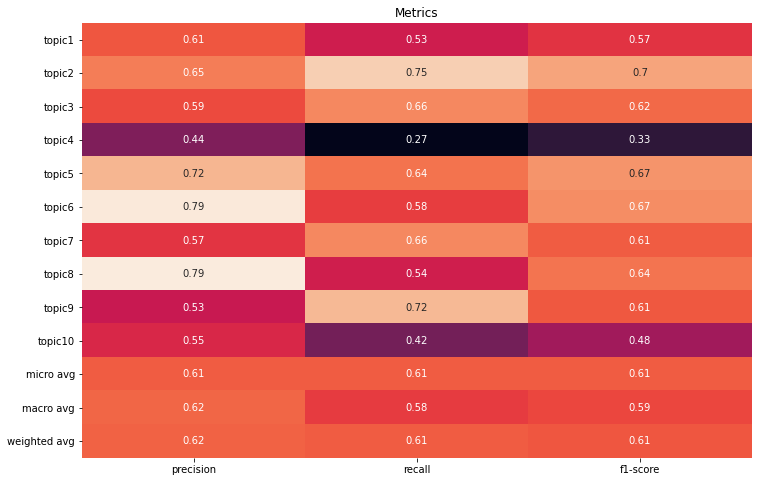

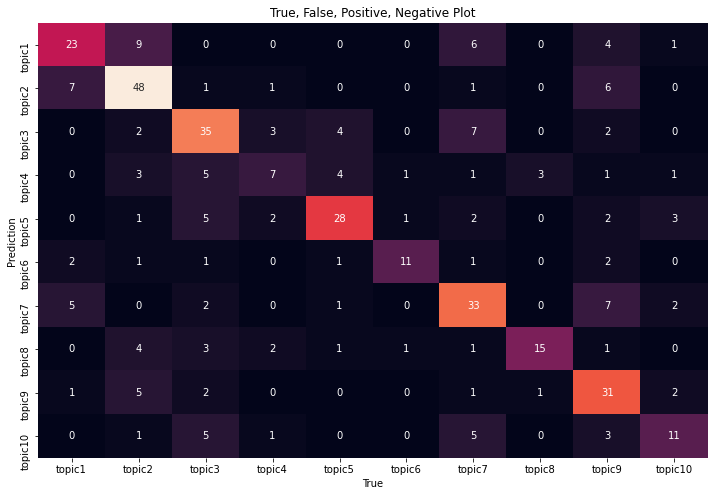

In [55]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train_tf.toarray(), y_train)

predictions = model.predict(x_test_tf.toarray())

sns.heatmap(plot_classification_report(classification_report(y_test, predictions, output_dict=True, target_names=class_names)),
            square=False, annot=True, cbar=False)
plt.title('Metrics')
plt.show()

sns.heatmap(confusion_matrix(y_test, predictions), square=False, annot=True, cbar=False,
            xticklabels=class_names,
            yticklabels=class_names)
plt.title('True, False, Positive, Negative Plot')
plt.xlabel('True')
plt.ylabel('Prediction')
plt.show()